In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
file = 'Mid-.csv'
df = pd.read_csv(file)

# **Pridiction**

encoding

In [57]:
x = df.select_dtypes(['object', 'datetime64']).columns
e = LabelEncoder()
df[x] = df[x].apply(LabelEncoder().fit_transform)

In [10]:
df.drop('Time', axis = 1, inplace = True)
df.drop('cumulative_energy_consumption', axis = 1, inplace = True)
df.drop('Trace_Level', axis = 1, inplace = True)
df.drop('Des_IP_Port', axis = 1, inplace = True)
df.drop('Broadcast_ID', axis = 1, inplace = True)
df.drop('Node_id', axis = 1, inplace = True)

In [11]:
iteration=30

**select from model**

In [12]:
X = df.drop(["TTL"], axis=1)
y = df["TTL"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
model = LinearRegression()
model.fit(X_train, y_train)
sfm = SelectFromModel(model, threshold="median")
sfm.fit(X_train, y_train)
features = X.columns[sfm.get_support()]
print("Selected features:", features)
X = X[features]

Selected features: Index(['Event', 'Rest_Energy', 'Hop_Count', 'Dest_Seq_Num', 'Src_Node_ID',
       'Src_Seq_Num', 'behaviour', 'energy_consumption'],
      dtype='object')


linear regression

In [13]:
dff = LinearRegression()
lr_mse_sfm = []
lr_mae_sfm = []
lr_rmse_sfm = []
lr_r2_sfm = []
for i in range(iteration):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
  dff.fit(X_train, y_train)
  y_pred = dff.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)
  lr_mse_sfm.append(mse)
  lr_mae_sfm.append(mae)
  lr_rmse_sfm.append(rmse)
  lr_r2_sfm.append(r2)
a_lr_mse_sfm = sum(lr_mse_sfm) / iteration
a_lr_mae_sfm = sum(lr_mae_sfm) / iteration
a_lr_rmse_sfm = sum(lr_rmse_sfm) / iteration
a_lr_r2_sfm = sum(lr_r2_sfm) / iteration
print("Linear Regression:")
print("MSE =", a_lr_mse_sfm)
print("MAE =", a_lr_mae_sfm)
print("RMSE =", a_lr_rmse_sfm)
print("R2 =", a_lr_r2_sfm * 100)

Linear Regression:
MSE = 13.518605983387305
MAE = 1.6312228236638924
RMSE = 3.6767131506493715
R2 = 58.450396600783385







Decision Tree Regression

In [16]:
X = df.drop(["TTL"], axis=1)
y = df["TTL"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
model = DecisionTreeRegressor(random_state=0)
model.fit(X_train, y_train)
sfm = SelectFromModel(model, threshold="median")
sfm.fit(X_train, y_train)
features = X.columns[sfm.get_support()]
print("Selected features:", features)
X = X[features]

Selected features: Index(['Event', 'S_Node', 'Rest_Energy', 'Source_IP_Port', 'Hop_Count',
       'Dest_Seq_Num', 'Src_Node_ID', 'Src_Seq_Num'],
      dtype='object')


In [18]:
dff = DecisionTreeRegressor()
dt_mse_sfm = []
dt_mae_sfm = []
dt_rmse_sfm = []
dt_r2_sfm = []
for i in range(iteration):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
  dff.fit(X_train, y_train)
  y_pred = dff.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)
  dt_mse_sfm.append(mse)
  dt_mae_sfm.append(mae)
  dt_rmse_sfm.append(rmse)
  dt_r2_sfm.append(r2)
a_dt_mse_sfm = sum(dt_mse_sfm) / iteration
a_dt_mae_sfm = sum(dt_mae_sfm) / iteration
a_dt_rmse_sfm = sum(dt_rmse_sfm) / iteration
a_dt_r2_sfm = sum(dt_r2_sfm) / iteration
print("Decision Tree:")
print("MSE =", a_dt_mse_sfm)
print("MAE =", a_dt_mae_sfm)
print("RMSE =", a_dt_rmse_sfm)
print("R2 =", a_dt_r2_sfm * 100)

Decision Tree:
MSE = 0.006417677717019824
MAE = 0.00029156698564593303
RMSE = 0.05820220399263876
R2 = 99.98028118201361


Randome forest

In [19]:
X = df.drop(["TTL"], axis=1)
y = df["TTL"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
model = RandomForestRegressor(random_state=0)
model.fit(X_train, y_train)
sfm = SelectFromModel(model, threshold='median')
sfm.fit(X_train, y_train)
features = X.columns[sfm.get_support()]
print("Selected features:", features)
X = X[features]

Selected features: Index(['S_Node', 'Rest_Energy', 'Source_IP_Port', 'Hop_Count', 'Dest_Node_Num',
       'Dest_Seq_Num', 'Src_Node_ID', 'Src_Seq_Num'],
      dtype='object')


In [20]:
dff = RandomForestRegressor()
rf_mse_sfm = []
rf_mae_sfm = []
rf_rmse_sfm = []
rf_r2_sfm = []
for i in range(iteration):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    dff.fit(X_train, y_train)
    y_pred = dff.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rf_mse_sfm.append(mse)
    rf_mae_sfm.append(mae)
    rf_rmse_sfm.append(rmse)
    rf_r2_sfm.append(r2)
a_rf_mse_sfm = sum(rf_mse_sfm) / iteration
a_rf_mae_sfm = sum(rf_mae_sfm) / iteration
a_rf_rmse_sfm = sum(rf_rmse_sfm) / iteration
a_rf_r2_sfm = sum(rf_r2_sfm) / iteration

In [21]:
print("Random Forest:")
print("MSE =", a_rf_mse_sfm)
print("MAE =", a_rf_mae_sfm)
print("RMSE =", a_rf_rmse_sfm)
print("R2 =", a_rf_r2_sfm * 100)

Random Forest:
MSE = 0.004125107085896559
MAE = 0.00046814479380268855
RMSE = 0.057077820130804584
R2 = 99.98732650197627


**recursive feature elimination**

choosing the right number of feature to select on this techniques & test multi cases on linear regression to choose the best number

**case 1**

In [49]:
X = df.drop(["TTL"], axis=1)
y = df["TTL"]
estimator = LinearRegression()
features_num = 8
rfe = RFE(estimator=estimator, n_features_to_select=features_num)
X_ = rfe.fit_transform(X, y)
s_m = rfe.support_
features = X.columns[s_m]
print("Selected features:", features)
X = X[features]

Selected features: Index(['Rest_Energy', 'Hop_Count', 'Dest_Node_Num', 'Dest_Seq_Num',
       'Src_Node_ID', 'Src_Seq_Num', 'behaviour', 'energy_consumption'],
      dtype='object')


In [50]:
dff = LinearRegression()
lr_mse_rfe = []
lr_mae_rfe = []
lr_rmse_rfe = []
lr_r2_rfe = []
for i in range(iteration):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
  dff.fit(X_train, y_train)
  y_pred = dff.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)
  lr_mse_rfe.append(mse)
  lr_mae_rfe.append(mae)
  lr_rmse_rfe.append(rmse)
  lr_r2_rfe.append(r2)
a_lr_mse_rfe = sum(lr_mse_rfe) / iteration
a_lr_mae_rfe = sum(lr_mae_rfe) / iteration
a_lr_rmse_rfe = sum(lr_rmse_rfe) / iteration
a_lr_r2_rfe = sum(lr_r2_rfe) / iteration
print("MSE =", a_lr_mse_rfe)
print("MAE =", a_lr_mae_rfe)
print("RMSE =", a_lr_rmse_rfe)
print("R2 =", a_lr_r2_rfe * 100)

MSE = 12.669101032048825
MAE = 1.6476993213012452
RMSE = 3.5593153098824986
R2 = 61.06141111262169


case **2**

In [51]:
X = df.drop(["TTL"], axis=1)
y = df["TTL"]
estimator = LinearRegression()
features_num = 10
rfe = RFE(estimator=estimator, n_features_to_select=features_num)
X_ = rfe.fit_transform(X, y)
s_m = rfe.support_
features = X.columns[s_m]
print("Selected features:", features)
X = X[features]

Selected features: Index(['Event', 'Rest_Energy', 'Hop_Count', 'Dest_Node_Num', 'Dest_Seq_Num',
       'Src_Node_ID', 'Src_Seq_Num', 'behaviour', 'rate_of_energy_consumption',
       'energy_consumption'],
      dtype='object')


In [52]:
dff = LinearRegression()
lr_mse_rfe = []
lr_mae_rfe = []
lr_rmse_rfe = []
lr_r2_rfe = []
for i in range(iteration):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
  dff.fit(X_train, y_train)
  y_pred = dff.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)
  lr_mse_rfe.append(mse)
  lr_mae_rfe.append(mae)
  lr_rmse_rfe.append(rmse)
  lr_r2_rfe.append(r2)
a_lr_mse_rfe = sum(lr_mse_rfe) / iteration
a_lr_mae_rfe = sum(lr_mae_rfe) / iteration
a_lr_rmse_rfe = sum(lr_rmse_rfe) / iteration
a_lr_r2_rfe = sum(lr_r2_rfe) / iteration
print("MSE =", a_lr_mse_rfe)
print("MAE =", a_lr_mae_rfe)
print("RMSE =", a_lr_rmse_rfe)
print("R2 =", a_lr_r2_rfe * 100)

MSE = 12.668935441270115
MAE = 1.6479375138142442
RMSE = 3.5592919688523406
R2 = 61.061920419943526


**case 3**

In [53]:
X = df.drop(["TTL"], axis=1)
y = df["TTL"]
estimator = LinearRegression()
features_num = 12
rfe = RFE(estimator=estimator, n_features_to_select=features_num)
X_ = rfe.fit_transform(X, y)
s_m = rfe.support_
features = X.columns[s_m]
print("Selected features:", features)
X = X[features]

Selected features: Index(['Event', 'Rest_Energy', 'Mac_Type_Pckt', 'Hop_Count', 'Dest_Node_Num',
       'Dest_Seq_Num', 'Src_Node_ID', 'Src_Seq_Num', 'behaviour', 'Type',
       'rate_of_energy_consumption', 'energy_consumption'],
      dtype='object')


In [54]:
dff = LinearRegression()
lr_mse_rfe = []
lr_mae_rfe = []
lr_rmse_rfe = []
lr_r2_rfe = []
for i in range(iteration):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
  dff.fit(X_train, y_train)
  y_pred = dff.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)
  lr_mse_rfe.append(mse)
  lr_mae_rfe.append(mae)
  lr_rmse_rfe.append(rmse)
  lr_r2_rfe.append(r2)
a_lr_mse_rfe = sum(lr_mse_rfe) / iteration
a_lr_mae_rfe = sum(lr_mae_rfe) / iteration
a_lr_rmse_rfe = sum(lr_rmse_rfe) / iteration
a_lr_r2_rfe = sum(lr_r2_rfe) / iteration
print("MSE =", a_lr_mse_rfe)
print("MAE =", a_lr_mae_rfe)
print("RMSE =", a_lr_rmse_rfe)
print("R2 =", a_lr_r2_rfe * 100)

MSE = 12.66802019649814
MAE = 1.6482083341639069
RMSE = 3.5591632694811377
R2 = 61.064738080215264


**case 4 (the best)**

linear regression

In [32]:
X = df.drop(["TTL"], axis=1)
y = df["TTL"]
estimator = LinearRegression()
features_num = 15
rfe = RFE(estimator=estimator, n_features_to_select=features_num)
X_ = rfe.fit_transform(X, y)
s_m = rfe.support_
features = X.columns[s_m]
print("Selected features:", features)
X = X[features]

Selected features: Index(['Event', 'S_Node', 'Rest_Energy', 'Mac_Type_Pckt', 'Source_IP_Port',
       'Packet_Size', 'Hop_Count', 'Dest_Node_Num', 'Dest_Seq_Num',
       'Src_Node_ID', 'Src_Seq_Num', 'behaviour', 'Type',
       'rate_of_energy_consumption', 'energy_consumption'],
      dtype='object')


In [33]:
dff = LinearRegression()
lr_mse_rfe = []
lr_mae_rfe = []
lr_rmse_rfe = []
lr_r2_rfe = []
for i in range(iteration):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
  dff.fit(X_train, y_train)
  y_pred = dff.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)
  lr_mse_rfe.append(mse)
  lr_mae_rfe.append(mae)
  lr_rmse_rfe.append(rmse)
  lr_r2_rfe.append(r2)
a_lr_mse_rfe = sum(lr_mse_rfe) / iteration
a_lr_mae_rfe = sum(lr_mae_rfe) / iteration
a_lr_rmse_rfe = sum(lr_rmse_rfe) / iteration
a_lr_r2_rfe = sum(lr_r2_rfe) / iteration
print("MSE =", a_lr_mse_rfe)
print("MAE =", a_lr_mae_rfe)
print("RMSE =", a_lr_rmse_rfe)
print("R2 =", a_lr_r2_rfe * 100)

MSE = 12.644655737833022
MAE = 1.6391174906817814
RMSE = 3.555879611970505
R2 = 61.136560172631114


Decision Tree Regression

In [34]:
X = df.drop(["TTL"], axis=1)
y = df["TTL"]
estimator = DecisionTreeRegressor()
features_num = 15
rfe = RFE(estimator=estimator, n_features_to_select=features_num)
X_ = rfe.fit_transform(X, y)
s_m = rfe.support_
features = X.columns[s_m]
print("Selected features:", features)
X = X[features]

Selected features: Index(['Event', 'S_Node', 'Rest_Energy', 'Mac_Type_Pckt', 'Source_IP_Port',
       'Packet_Size', 'Hop_Count', 'Dest_Node_Num', 'Dest_Seq_Num',
       'Src_Node_ID', 'Src_Seq_Num', 'behaviour', 'Type',
       'rate_of_energy_consumption', 'energy_consumption'],
      dtype='object')


In [37]:
dff = DecisionTreeRegressor()
dt_mse_rfe = []
dt_mae_rfe = []
dt_rmse_rfe = []
dt_r2_rfe = []
for i in range(iteration):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
  dff.fit(X_train, y_train)
  y_pred = dff.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)
  dt_mse_rfe.append(mse)
  dt_mae_rfe.append(mae)
  dt_rmse_rfe.append(rmse)
  dt_r2_rfe.append(r2)
a_dt_mse_rfe = sum(dt_mse_rfe) / iteration
a_dt_mae_rfe = sum(dt_mae_rfe) / iteration
a_dt_rmse_rfe = sum(dt_rmse_rfe) / iteration
a_dt_r2_rfe = sum(dt_r2_rfe) / iteration
print("MSE =", a_dt_mse_rfe)
print("MAE =", a_dt_mae_rfe)
print("RMSE =", a_dt_rmse_rfe)
print("R2 =", a_dt_r2_rfe * 100)

MSE = 0.007360019366598314
MAE = 0.00033321941216678063
RMSE = 0.06512295691846014
R2 = 99.9774201065857


randome forest

In [35]:
X = df.drop(["TTL"], axis=1)
y = df["TTL"]
estimator = RandomForestRegressor()
features_num = 15
rfe = RFE(estimator=estimator, n_features_to_select=features_num)
X_ = rfe.fit_transform(X, y)
s_m = rfe.support_
features = X.columns[s_m]
print("Selected features:", features)
X = X[features]

Selected features: Index(['Event', 'S_Node', 'Rest_Energy', 'Mac_Type_Pckt', 'Source_IP_Port',
       'Packet_Size', 'Hop_Count', 'Dest_Node_Num', 'Dest_Seq_Num',
       'Src_Node_ID', 'Src_Seq_Num', 'behaviour', 'Type',
       'rate_of_energy_consumption', 'energy_consumption'],
      dtype='object')


In [38]:
dff = RandomForestRegressor()
rf_mse_rfe = []
rf_mae_rfe = []
rf_rmse_rfe = []
rf_r2_rfe = []
for i in range(iteration):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    dff.fit(X_train, y_train)
    y_pred = dff.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rf_mse_rfe.append(mse)
    rf_mae_rfe.append(mae)
    rf_rmse_rfe.append(rmse)
    rf_r2_rfe.append(r2)
a_rf_mse_rfe = sum(rf_mse_rfe) / iteration
a_rf_mae_rfe = sum(rf_mae_rfe) / iteration
a_rf_rmse_rfe = sum(rf_rmse_rfe) / iteration
a_rf_r2_rfe = sum(rf_r2_rfe) / iteration

In [ ]:
print("Random Forest:")
print("MSE =", a_rf_mse_rfe)
print("MAE =", a_rf_mae_rfe)
print("RMSE =", a_rf_rmse_rfe)
print("R2 =", a_rf_r2_rfe * 100)

Random Forest:
MSE = 0.004266297562087035
MAE = 0.0005032111528822056
RMSE = 0.05778371548185557
R2 = 99.9868924108648


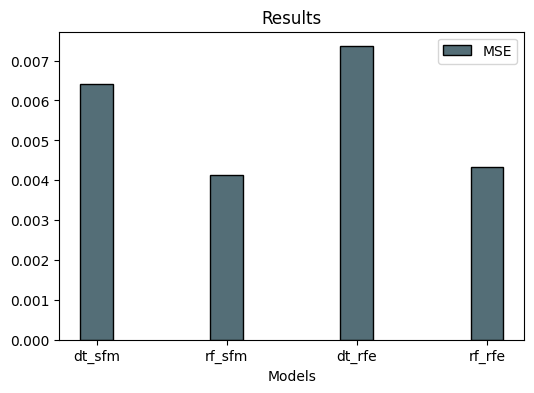

In [39]:
s = ['dt_sfm','rf_sfm',"dt_rfe","rf_rfe"]
z = [a_dt_mse_sfm,a_rf_mse_sfm,a_dt_mse_rfe,a_rf_mse_rfe]
X = np.arange(len(s))
plt.figure(figsize=(6, 4))
plt.bar(X+0, z, color ="#546E77", width = 0.25, edgecolor = 'black', label = 'MSE')
plt.xticks(X, s)
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Models")
plt.title("Results")
plt.show()

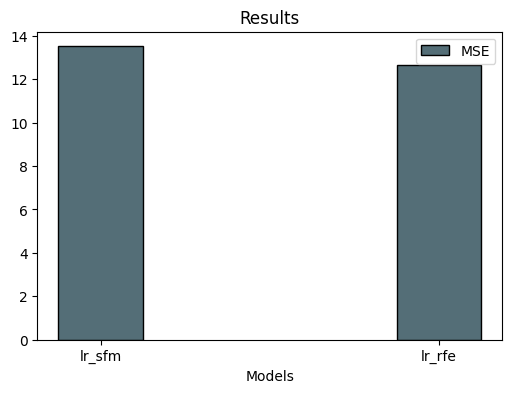

In [40]:
s = ['lr_sfm','lr_rfe']
z = [a_lr_mse_sfm,a_lr_mse_rfe]
X = np.arange(len(s))
plt.figure(figsize=(6, 4))
plt.bar(X+0, z, color ="#546E77", width = 0.25, edgecolor = 'black', label = 'MSE')
plt.xticks(X, s)
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Models")
plt.title("Results")
plt.show()

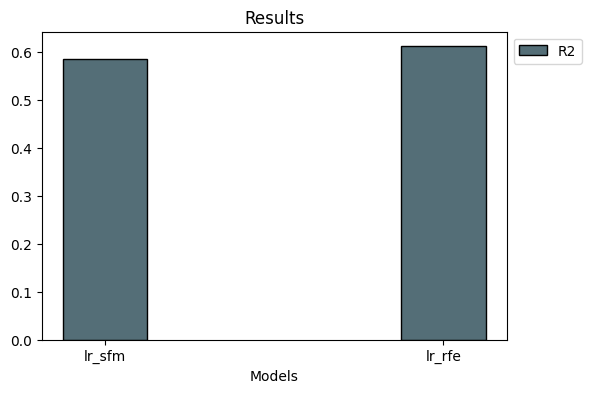

In [42]:
s = ['lr_sfm','lr_rfe']
z = [a_lr_r2_sfm,a_lr_r2_rfe]
X = np.arange(len(s))
plt.figure(figsize=(6, 4))
plt.bar(X+0, z, color ="#546E77", width = 0.25, edgecolor = 'black', label = 'R2')
plt.xticks(X, s)
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Models")
plt.title("Results")
plt.show()

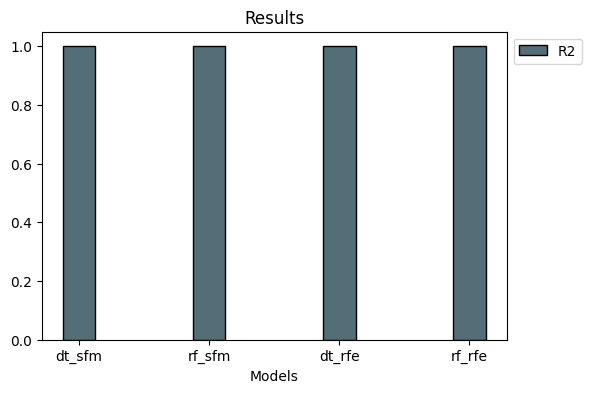

In [41]:
s = ['dt_sfm','rf_sfm',"dt_rfe","rf_rfe"]
z = [a_dt_r2_sfm,a_rf_r2_sfm,a_dt_r2_rfe,a_rf_r2_rfe]
X = np.arange(len(s))
plt.figure(figsize=(6, 4))
plt.bar(X+0, z, color ="#546E77", width = 0.25, edgecolor = 'black', label = 'R2')
plt.xticks(X, s)
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Models")
plt.title("Results")
plt.show()

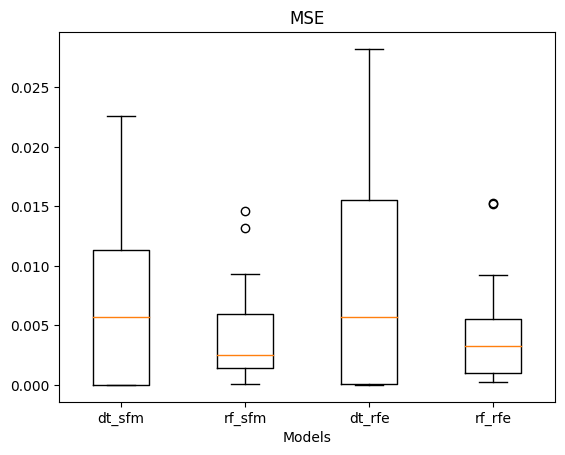

In [45]:
s = ['dt_sfm','rf_sfm',"dt_rfe","rf_rfe"]
z = [dt_mse_sfm,rf_mse_sfm,dt_mse_rfe,rf_mse_rfe]
plt.boxplot(z)
X = np.arange(len(s))
plt.xticks(X+1, s)
plt.xlabel("Models")
plt.title("MSE")
plt.show()

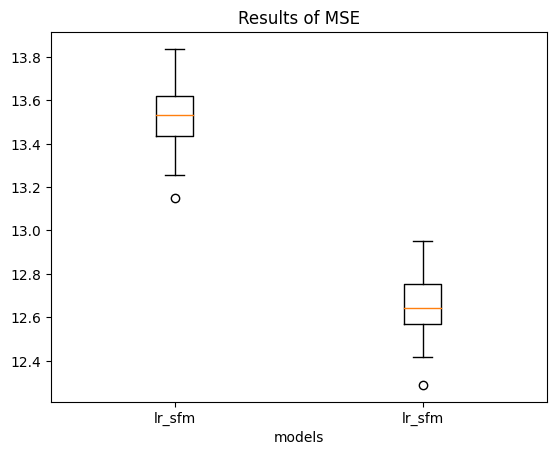

In [62]:
s = ['lr_sfm','lr_sfm']
z = [lr_mse_sfm,lr_mse_rfe]
plt.boxplot(z)
X = np.arange(len(s))
plt.xticks(X+1, s)
plt.xlabel("models")
plt.title("Results of MSE")
plt.show()

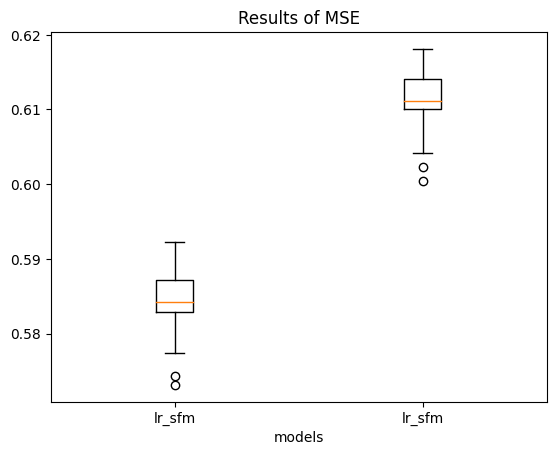

In [61]:
s = ['lr_sfm','lr_sfm']
z = [lr_r2_sfm,lr_r2_rfe]
plt.boxplot(z)
X = np.arange(len(s))
plt.xticks(X+1, s)
plt.xlabel("models")
plt.title("Results of MSE")
plt.show()

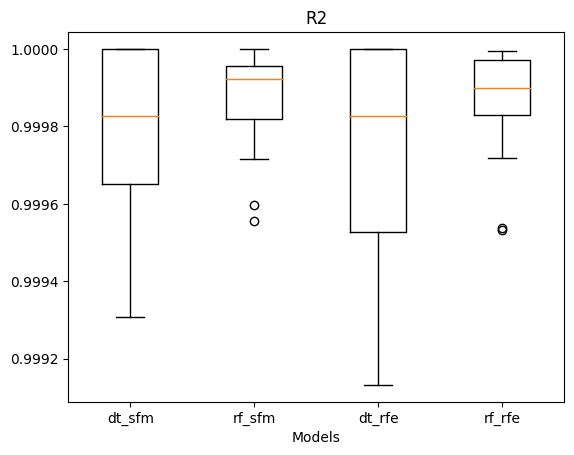

In [60]:
s = ['dt_sfm','rf_sfm',"dt_rfe","rf_rfe"]
z = [dt_r2_sfm,rf_r2_sfm,dt_r2_rfe,rf_r2_rfe]
plt.boxplot(z)
X = np.arange(len(s))
plt.xticks(X+1, s)
plt.xlabel("Models")
plt.title("R2")
plt.show()